In [137]:
#Importing the Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression

In [115]:
#Importing the Training Set and the Sample Submission
df=pd.read_csv("/content/train_ctrUa4K.csv")
df1=pd.read_csv("/content/sample_submission_49d68Cx.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [116]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [117]:
#drop the Loan ID as Not Required
useless=["Loan_ID"]
df.drop(useless,axis=1,inplace=True)

In [118]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#EDA
#Visualization of Various Features with the Output

In [119]:
boolean_category=['Gender','Married','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
int_category=['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [120]:
print(boolean_category)
print(int_category)

['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


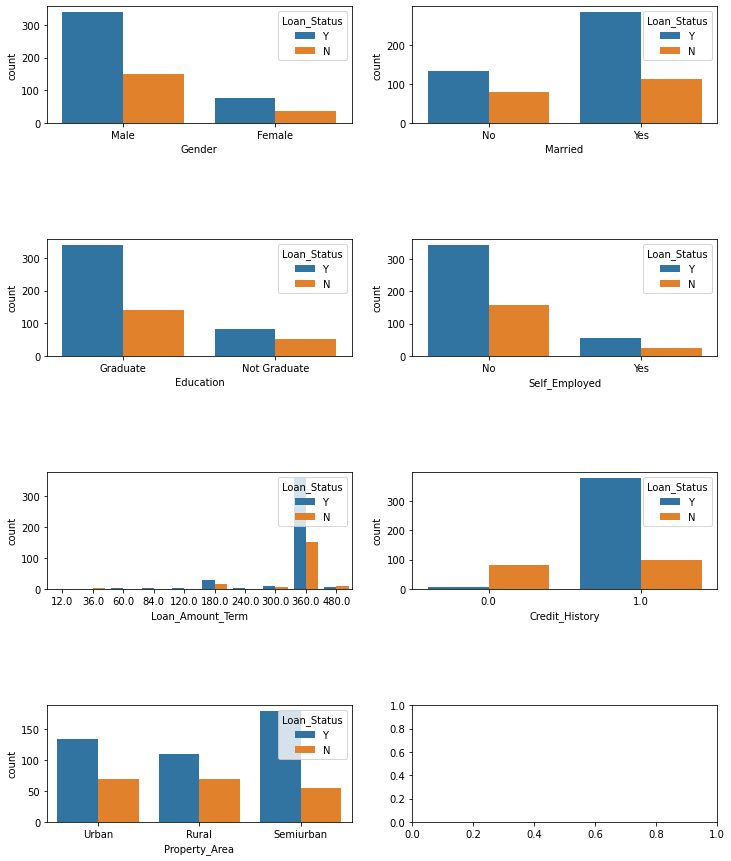

In [121]:
fig,axes=plt.subplots(4,2,figsize=(12,15))
for index,column in enumerate(boolean_category):
  row,col=index//2,index%2
  sns.countplot(x=column,data=df,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

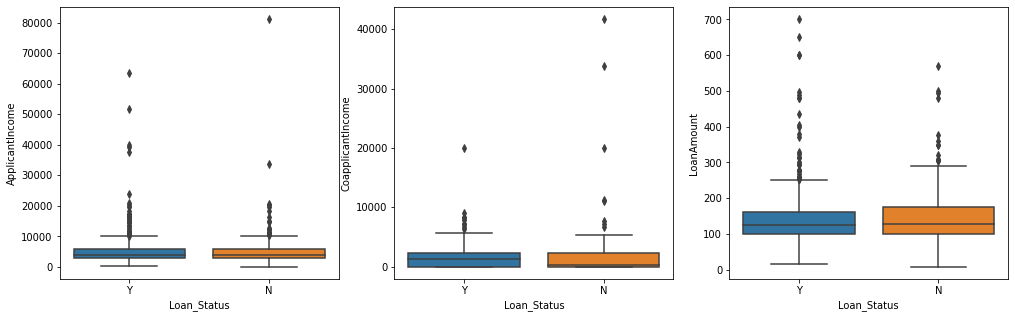

In [122]:
fig,axes=plt.subplots(1,3,figsize=(17,5))
for index,column in enumerate(int_category):
  sns.boxplot(y=column,x='Loan_Status',data=df,ax=axes[index])
plt.subplots_adjust(hspace=2)

In [123]:
df_encoded=pd.get_dummies(df,drop_first=True)
y=df_encoded["Loan_Status_Y"]
x=df_encoded.drop('Loan_Status_Y',axis=1)


#SPLITING OF THE TRAINING SET
#Training Set and the Cross-Validation Set

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,stratify=y,random_state=42)
imp=SimpleImputer(strategy='mean')
imp_train=imp.fit(x_train) #Fitting it to the Training Set
x_train=imp_train.transform(x_train)
x_test=imp_train.transform(x_test)

In [125]:
#print(x_train)
#print(y_train)
y_train.head()

468    1
502    1
554    0
106    1
240    1
Name: Loan_Status_Y, dtype: uint8

TRYING LOGISTIC REGRESSION

In [126]:
train_acc=[]
test_acc=[]
train_f1=[]
test_f1=[]
threshold=[]
for i in np.arange(0.05,0.95,0.05):
  log_md=LogisticRegression(solver="liblinear")
  log_md.fit(x_train,y_train)
  y_pred_thre=log_md.predict_proba(x_train)[:,1]
  y_pred=(y_pred_thre > i).astype(int)

  train_a=accuracy_score(y_train,y_pred)
  train_f=f1_score(y_train,y_pred)

  y_pred_thre=log_md.predict_proba(x_test)[:,1]
  y_pred=(y_pred_thre > i).astype(int)

  test_a=accuracy_score(y_test,y_pred)
  test_f=f1_score(y_test,y_pred)

  train_acc.append(train_a)
  train_f1.append(train_f)
  test_acc.append(test_a)
  test_f1.append(test_f)
  threshold.append(i)


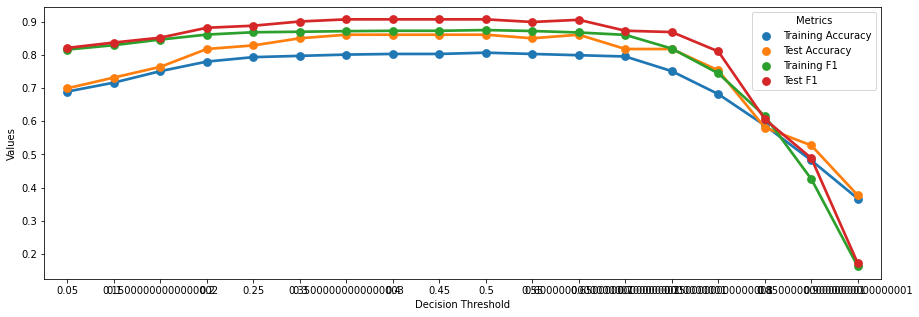

In [127]:
Threshold_log_md = {"Training Accuracy": train_acc, "Test Accuracy": test_acc, "Training F1": train_f1, "Test F1":test_f1, "Decision Threshold": threshold}
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_log_md)
plot_df=Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [128]:
thresh = 0.45 
y_pred_test_thresh = log_md.predict_proba(x_test)[:,1]
y_pred=(y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8602150537634409
Test F1 Score:  0.9064748201438849
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,17,12,29
1,1,63,64
All,18,75,93


In [129]:
df2=pd.read_csv('/content/test_lAUu6dG.csv')
kk=df2["Loan_ID"]
kkk=['Loan_ID']
df2.drop(kkk,axis=1,inplace=True)
df22=pd.get_dummies(df2,drop_first=True)
df22.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,NaN,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [130]:
x_test_real=imp_train.transform(df22)

In [131]:
log_md=LogisticRegression(solver='liblinear')
log_md.fit(x_train,y_train)
y_thre_real=log_md.predict_proba(x_test_real)[:,1]
y_pred_real=(y_thre_real > 0.45).astype(int)


In [132]:
#y_pred_real

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [139]:
y_pred_real_ss=[]
for i in y_pred_real:
  if(i==1):
    y_pred_real_ss.append('Y')
  else:
    y_pred_real_ss.append('N')
#y_pred_real_ss

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N'

In [134]:
dd={}
dd['Loan_ID']=kk
dd['Loan_Status']=y_pred_real_ss
df_real=pd.DataFrame(dd)

In [135]:
df_real.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [136]:
df_real.to_csv("Predicted_Loan_Test.csv")